In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [10]:
datapath = 'data/ccvid/gallery.pkl'

with open(datapath, 'rb') as f:
    content = pickle.load(f)

In [11]:
# len(content['data'][3]['img_paths'])
len(content['data'])

1074

In [3]:
for item in content['data']:
    item['shape_1024'] = [list(i) for i in item['shape_1024']]

In [4]:
with open(datapath, 'wb') as f:
    pickle.dump(content, f)

: 

: 

In [7]:
idx = 3
len(content['data'][idx]['img_paths'])

17

In [71]:
idx = 1
len(content['data'][idx]['img_paths'])

25

In [78]:
idx1 = 1
idx2 = 0
sample_img = content['data'][idx1]['img_paths'][idx2]
sample_pose = content['data'][idx1]['pose'][idx2]
sample_kp3d = content['data'][idx1]['joints3d'][idx2]

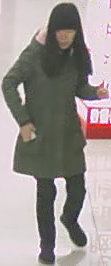

In [79]:
Image.open(sample_img)

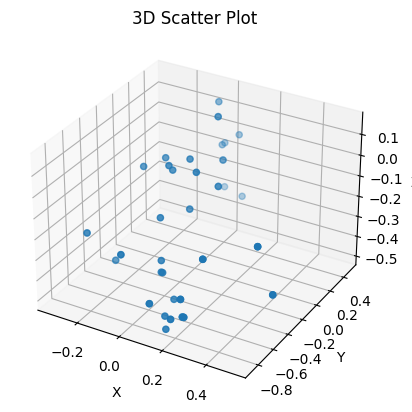

In [81]:

kp3d = np.array(sample_kp3d)
x = kp3d[:, 0]
y = kp3d[:, 1]
z = kp3d[:, 2]

# Create the figure and axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create the scatter plot
ax.scatter(x, y, z)

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Scatter Plot')
plt.gca()
# Show the plot
plt.show()

In [15]:
pid_container = set()
for item in content['data']:
    pid_container.add(item['p_id'])

pid_container = sorted(pid_container)
pid2label = {pid:label for label, pid in enumerate(pid_container)}

for item in content['data']:
    cur_pid = item['p_id']
    new_pid = pid2label[cur_pid]
    item['p_id'] = new_pid


In [19]:
with open(datapath, 'wb') as f:
    pickle.dump(content, f)

In [22]:
for item in content['data']:
    del item['tracklet_id']

In [23]:
with open(datapath, 'wb') as f:
    pickle.dump(content, f)

In [30]:
import pickle, os
import os.path as osp

old_path = '/media/dustin/DATA/Research/Video-based ReID'
new_path = '/project/shah/dustin/VideoDatasets'

# for dataset in os.listdir('data/vccr'):
#     dataset_path = osp.join('data', dataset)
# for file in os.listdir('data/ccvid'):
#     mode = file.split('.')[0]
file_path = 'data/ccvid/train.pkl'
with open(file_path, 'rb') as f:
    content = pickle.load(f)
paths = []
for item in content['data']:
    for i in item['img_paths']:
        path = i[0]
        paths.append(path)
    item['img_paths'] = paths
# new_file_path = osp.join('data/ccvid', 'train_.pkl')
with open(file_path, 'wb') as f:
    pickle.dump(content, f)
    
print('done')

done


In [1]:
import glob
import numpy as np
import os.path as osp

root = "/media/dustin/DATA/Research/Video-based ReID/CCVID"

def process_data(data_path, relabel=False, clothes2label=None):
    tracklet_path_list = []
    pid_container = set()
    clothes_container = set()
    with open(data_path, 'r') as f:
        for line in f:
            new_line = line.rstrip()
            tracklet_path, pid, clothes_label = new_line.split()
            tracklet_path_list.append((tracklet_path, pid, clothes_label))
            clothes = '{}_{}'.format(pid, clothes_label)
            pid_container.add(pid)
            clothes_container.add(clothes)
    pid_container = sorted(pid_container)
    clothes_container = sorted(clothes_container)
    pid2label = {pid:label for label, pid in enumerate(pid_container)}
    if clothes2label is None:
        clothes2label = {clothes:label for label, clothes in enumerate(clothes_container)}

    num_tracklets = len(tracklet_path_list)
    num_pids = len(pid_container)
    num_clothes = len(clothes_container)

    tracklets = []
    num_imgs_per_tracklet = []
    pid2clothes = np.zeros((num_pids, len(clothes2label)))

    for tracklet_path, pid, clothes_label in tracklet_path_list:
        img_paths = glob.glob(osp.join(root, tracklet_path, '*')) 
        img_paths.sort()

        clothes = '{}_{}'.format(pid, clothes_label)
        clothes_id = clothes2label[clothes]
        pid2clothes[pid2label[pid], clothes_id] = 1
        if relabel:
            pid = pid2label[pid]
        else:
            pid = int(pid)
        session = tracklet_path.split('/')[0]
        cam = tracklet_path.split('_')[1]
        if session == 'session3':
            camid = int(cam) + 12
        else:
            camid = int(cam)

        num_imgs_per_tracklet.append(len(img_paths))
        tracklets.append((img_paths, pid, camid, clothes_id))

    num_tracklets = len(tracklets)

    return tracklets, num_tracklets, num_pids, num_imgs_per_tracklet, num_clothes, pid2clothes, clothes2label

def clothes2label_test(query_path, gallery_path):
    pid_container = set()
    clothes_container = set()
    with open(query_path, 'r') as f:
        for line in f:
            new_line = line.rstrip()
            tracklet_path, pid, clothes_label = new_line.split()
            clothes = '{}_{}'.format(pid, clothes_label)
            pid_container.add(pid)
            clothes_container.add(clothes)
    with open(gallery_path, 'r') as f:
        for line in f:
            new_line = line.rstrip()
            tracklet_path, pid, clothes_label = new_line.split()
            clothes = '{}_{}'.format(pid, clothes_label)
            pid_container.add(pid)
            clothes_container.add(clothes)
    pid_container = sorted(pid_container)
    clothes_container = sorted(clothes_container)
    pid2label = {pid:label for label, pid in enumerate(pid_container)}
    clothes2label = {clothes:label for label, clothes in enumerate(clothes_container)}

    return clothes2label

In [2]:
query_path = "/media/dustin/DATA/Research/Video-based ReID/CCVID/query.txt"
gallery_path = "/media/dustin/DATA/Research/Video-based ReID/CCVID/gallery.txt"
train_path = "/media/dustin/DATA/Research/Video-based ReID/CCVID/train.txt"

# clothes2label = clothes2label_test(query_path, gallery_path)

# query, num_query_tracklets, num_query_pids, num_query_imgs, num_query_clothes, _, _ = \
#     process_data(query_path, relabel=False, clothes2label=clothes2label)

# gallery, num_gallery_tracklets, num_gallery_pids, num_gallery_imgs, num_gallery_clothes, _, _ = \
#     process_data(gallery_path, relabel=False, clothes2label=clothes2label)
train, num_train_tracklets, num_train_pids, num_train_imgs, num_train_clothes, pid2clothes, _ = \
    process_data(train_path, relabel=True)  

In [16]:
query_set = []
for item in query:
#img_paths, pid, camid, clothes_id
    query_set.append({
        'img_paths': item[0],
        'p_id': item[1],
        'cam_id': item[2],
        'clothes_id': item[3],
    })
gallery_set = []
for item in gallery:
#img_paths, pid, camid, clothes_id
    gallery_set.append({
        'img_paths': item[0],
        'p_id': item[1],
        'cam_id': item[2],
        'clothes_id': item[3],
    })

In [19]:
gallery_content = {
    'data': gallery_set,
    'num_clothes': num_gallery_clothes,
    'num_pids': num_gallery_pids
}
query_content = {
    'data': query_set,
    'num_clothes': num_query_clothes,
    'num_pids': num_query_pids
}

In [20]:
with open('data/ccvid/query.pkl', 'wb') as f:
    pickle.dump(query_content, f)
with open('data/ccvid/gallery.pkl', 'wb') as f:
    pickle.dump(gallery_content, f)